# EV Charging Pattern Analysis

Understanding the patterns in electric vehicle (EV) charging behavior is crucial for optimizing charging infrastructure, improving user experience, and making data-driven decisions in the rapidly evolving EV market. Analyzing charging patterns helps identify trends in energy consumption, user preferences, and the impact of various factors such as charger type, vehicle model, and environmental conditions on charging efficiency and cost. By examining factors like charging rates, time of day, and temperature influences, we can gain valuable insights into user behavior and operational needs, leading to better resource allocation and enhanced charging strategies. This analysis aims to uncover key trends in EV charging that will guide the development of more efficient charging solutions and support the transition to sustainable transportation.

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download('valakhorasani/electric-vehicle-charging-patterns')
path

e:\Python software\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'C:\\Users\\ASUS\\.cache\\kagglehub\\datasets\\valakhorasani\\electric-vehicle-charging-patterns\\versions\\1'

In [2]:
# Read Data  

ev_charging_df = pd.read_csv(f"{path}/ev_charging_patterns.csv")



In [3]:
# Sample Data

ev_charging_df.sample(5)

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
520,User_521,BMW i3,85.0,Station_352,Houston,2024-01-22 16:00:00,2024-01-22 17:47:00,60.123723,2.969014,30.659344,19.627277,Night,Friday,30.098511,86.757940,205.553119,34.632247,6.0,DC Fast Charger,Long-Distance Traveler
1179,User_1180,Tesla Model 3,100.0,Station_178,Chicago,2024-02-19 03:00:00,2024-02-19 05:23:00,13.003539,1.704673,41.184943,18.408042,Evening,Sunday,40.694992,57.666009,245.858001,39.631909,6.0,Level 2,Casual Driver
130,User_131,Chevy Bolt,100.0,Station_292,Los Angeles,2024-01-06 10:00:00,2024-01-06 13:15:00,47.527459,3.804900,14.328176,31.098591,Afternoon,Tuesday,59.932996,81.183982,139.383727,18.979823,3.0,Level 2,Commuter
643,User_644,Chevy Bolt,62.0,Station_485,Houston,2024-01-27 19:00:00,2024-01-27 21:03:00,38.360412,1.296983,38.343764,10.225542,Night,Tuesday,72.505010,86.300718,281.025212,5.501272,4.0,DC Fast Charger,Long-Distance Traveler
83,User_84,Hyundai Kona,62.0,Station_287,San Francisco,2024-01-04 11:00:00,2024-01-04 13:54:00,32.832957,3.408638,44.492366,39.674823,Night,Wednesday,26.654722,63.710627,279.898272,5.803389,1.0,Level 2,Casual Driver


In [4]:
# Information of data

ev_charging_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [5]:
# Description of data

ev_charging_df.describe()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1254.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,22.411705,1.061037,14.011326,10.751494,24.074134,17.080580,86.004987,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,23.881193,1.397623,13.856583,13.368141,27.786903,62.053266,79.445335,2.800664,2.000000
50%,75.000000,42.691405,2.258136,25.603799,22.076360,48.241771,75.682496,152.259867,14.630846,4.000000
75%,85.000000,61.206218,3.112806,37.502998,31.646044,69.277921,88.201370,226.073284,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


In [6]:
# Check Null Data

ev_charging_df[ev_charging_df.isnull().any(axis=1)]

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
21,User_22,Hyundai Kona,62.000000,Station_485,New York,2024-01-01 21:00:00,2024-01-01 22:55:00,59.135032,2.931761,NaN,34.853234,Evening,Sunday,71.530312,75.974352,219.626357,-2.755069,5.000000,Level 1,Commuter
28,User_29,BMW i3,75.000000,Station_129,Los Angeles,2024-01-02 04:00:00,2024-01-02 04:35:00,31.684485,2.439678,48.648723,25.617104,Afternoon,Friday,34.727639,54.402050,NaN,20.378562,3.000000,Level 2,Casual Driver
30,User_31,Chevy Bolt,100.000000,Station_239,New York,2024-01-02 06:00:00,2024-01-02 09:54:00,19.473801,1.435533,7.043936,36.945273,Afternoon,Wednesday,31.320787,78.056653,NaN,8.352906,2.000000,DC Fast Charger,Casual Driver
44,User_45,Nissan Leaf,75.000000,Station_44,Los Angeles,2024-01-02 20:00:00,2024-01-02 22:29:00,NaN,3.296057,5.114613,30.037969,Morning,Wednesday,15.220939,132.952011,49.384266,32.014577,3.680053,Level 2,Long-Distance Traveler
48,User_49,Nissan Leaf,85.000000,Station_463,Los Angeles,2024-01-03 00:00:00,2024-01-03 01:57:00,NaN,1.743435,14.149666,13.112874,Night,Monday,77.809423,87.948114,212.940342,-4.446671,1.000000,Level 1,Casual Driver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,User_1282,Nissan Leaf,50.000000,Station_489,Chicago,2024-02-23 09:00:00,2024-02-23 10:18:00,6.448880,2.246434,11.019392,5.388237,Morning,Saturday,26.982929,98.397370,NaN,12.193185,7.000000,DC Fast Charger,Long-Distance Traveler
1284,User_1285,Hyundai Kona,63.990544,Station_77,Los Angeles,2024-02-23 12:00:00,2024-02-23 14:57:00,30.987567,1.932806,NaN,35.732028,Evening,Saturday,73.307240,76.174642,203.060254,28.353833,5.000000,DC Fast Charger,Commuter
1303,User_1304,Hyundai Kona,81.062030,Station_103,Houston,2024-02-24 07:00:00,2024-02-24 10:41:00,NaN,1.695958,13.487242,14.317812,Morning,Friday,83.091207,76.501221,11.256662,13.737856,5.000000,Level 1,Long-Distance Traveler
1310,User_1311,Tesla Model 3,62.000000,Station_268,New York,2024-02-24 14:00:00,2024-02-24 17:50:00,66.979908,0.775663,13.787151,38.833010,Afternoon,Saturday,64.126073,94.364933,NaN,36.432088,1.000000,Level 2,Casual Driver


In [7]:
# Calculate null values of each column

null_values_for_each_column = ev_charging_df.isna().sum()

null_values_for_each_column

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64

In [8]:
# Fill the null values with mean of itself column

ev_charging_df = ev_charging_df.apply(lambda col: col.fillna(col.mean()) if col.dtype in ['float64','int64'] else col)

In [9]:
ev_charging_df.isna().sum()

User ID                                     0
Vehicle Model                               0
Battery Capacity (kWh)                      0
Charging Station ID                         0
Charging Station Location                   0
Charging Start Time                         0
Charging End Time                           0
Energy Consumed (kWh)                       0
Charging Duration (hours)                   0
Charging Rate (kW)                          0
Charging Cost (USD)                         0
Time of Day                                 0
Day of Week                                 0
State of Charge (Start %)                   0
State of Charge (End %)                     0
Distance Driven (since last charge) (km)    0
Temperature (°C)                            0
Vehicle Age (years)                         0
Charger Type                                0
User Type                                   0
dtype: int64

In [10]:
# Convert Charging Start Time and Charging End Time to Object to DateTime Object

ev_charging_df['Charging Start Time'] = pd.to_datetime(ev_charging_df['Charging Start Time'])
ev_charging_df['Charging End Time'] = pd.to_datetime(ev_charging_df['Charging End Time'])

print(ev_charging_df['Charging Start Time'].dtype)
print(ev_charging_df['Charging End Time'].dtype)


datetime64[ns]
datetime64[ns]


In [11]:
# Check size of the dataset

ev_charging_df.shape

(1320, 20)

In [12]:
# Rounding Float Values to Two Decimal Places

ev_charging_df = ev_charging_df.apply(lambda col: col.round(2) if col.dtype == 'float64' else col)

ev_charging_df.select_dtypes(include='float64')

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
0,108.46,60.71,0.59,36.39,13.09,29.37,86.12,293.60,27.95,2.0
1,100.00,12.34,3.13,30.68,21.13,10.12,84.66,112.11,14.31,3.0
2,75.00,19.13,2.45,27.51,35.67,6.85,69.92,71.80,21.00,2.0
3,50.00,79.46,1.27,32.88,13.04,83.12,99.62,199.58,38.32,1.0
4,50.00,19.63,2.02,10.22,10.16,54.26,63.74,203.66,-7.83,1.0
...,...,...,...,...,...,...,...,...,...,...
1315,100.00,42.01,1.43,5.90,22.08,39.20,83.92,239.60,1.92,7.0
1316,100.00,68.19,3.24,18.39,5.07,31.46,93.10,164.38,34.03,4.0
1317,100.00,18.90,3.27,45.48,37.26,71.90,78.68,226.52,20.36,5.0
1318,85.00,13.76,2.75,38.15,39.05,76.19,65.93,291.49,24.13,5.0


In [13]:
# Converting Vehicle(Age) Float Values to Integers with Standard Rounding

ev_charging_df['Vehicle Age (years)'] = ev_charging_df['Vehicle Age (years)'].round().astype(int)

ev_charging_df['Vehicle Age (years)'].unique()

array([ 2,  3,  1,  0,  4,  7,  6,  5,  8, 11,  9, 12])

In [14]:
# Create a New Charging Duration Column To inefficient values 

ev_charging_df.sample(5)

charging_start_time = ev_charging_df['Charging Start Time']
charging_end_time = ev_charging_df['Charging End Time']

ev_charging_df['Claculated Duration Time(Hour)'] = ((ev_charging_df['Charging End Time'] - ev_charging_df['Charging Start Time']).dt.total_seconds() / 3600).round(2)


ev_charging_df['Claculated Duration Time(Hour)']

0       0.65
1       2.02
2       2.80
3       3.70
4       1.77
        ... 
1315    1.50
1316    0.73
1317    2.05
1318    1.33
1319    0.93
Name: Claculated Duration Time(Hour), Length: 1320, dtype: float64

In [15]:
# # Grouping the Vehicle Age(Years)

def group_vehicle_age(vehicle_age):
    if vehicle_age <= 2:
        return "0-2"
    elif vehicle_age <= 5:
        return "3-5"
    else:
        return "More than 5"
    
ev_charging_df['Vehicle Age Group'] = ev_charging_df['Vehicle Age (years)'].apply(group_vehicle_age)

ev_charging_df[['Vehicle Age (years)','Vehicle Age Group']]
        

,Vehicle Age (years),Vehicle Age Group
0,2,0-2
1,3,3-5
2,2,0-2
3,1,0-2
4,1,0-2
...,...,...
1315,7,More than 5
1316,4,3-5
1317,5,3-5
1318,5,3-5


# Distributation of Vehicle Model

In [16]:
distributation_of_vehicle_model = ev_charging_df['Vehicle Model'].value_counts().reset_index()

distributation_of_vehicle_model

,Vehicle Model,count
0,Tesla Model 3,280
1,Hyundai Kona,266
2,Nissan Leaf,260
3,BMW i3,258
4,Chevy Bolt,256


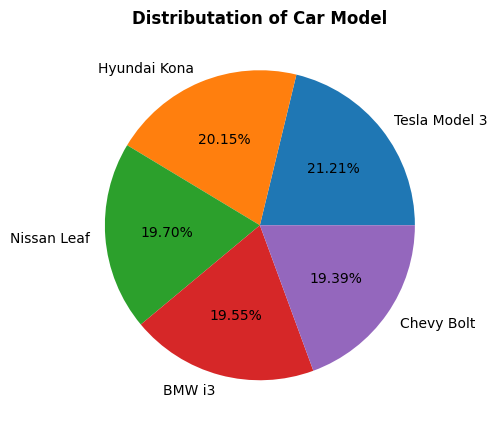

In [17]:
plt.figure(figsize=(5,10))
labels = distributation_of_vehicle_model['Vehicle Model']

plt.pie(distributation_of_vehicle_model['count'], labels = labels ,  autopct='%1.2f%%')
plt.title("Distributation of Car Model",fontdict={'fontsize':12,'fontweight':'bold'})

plt.show()

# Distributation of Charging Station Location

In [18]:
distributation_of_charging_station_location =  ev_charging_df['Charging Station Location'].value_counts().reset_index(name='Total Station')
distributation_of_charging_station_location

,Charging Station Location,Total Station
0,Los Angeles,297
1,San Francisco,264
2,Houston,262
3,New York,255
4,Chicago,242


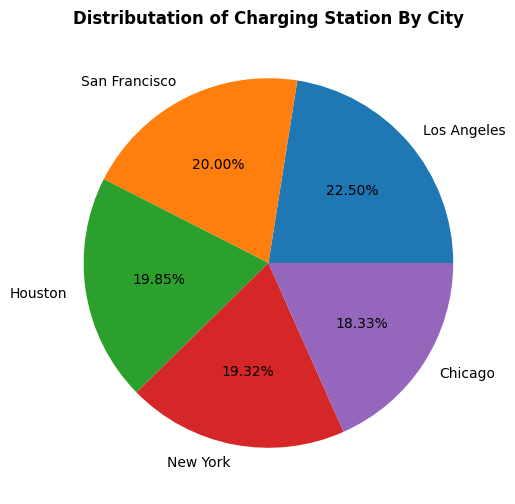

In [19]:
plt.figure(figsize=(6,6))

plt.pie(distributation_of_charging_station_location['Total Station'], labels=distributation_of_charging_station_location['Charging Station Location'] , autopct='%1.2f%%')
plt.title('Distributation of Charging Station By City',fontdict={'fontsize':12,'fontweight':'bold'})

plt.show()

# Distributation of Charger Type

In [20]:
distributation_Charger_Type = ev_charging_df['Charger Type'].value_counts().reset_index()

distributation_Charger_Type



,Charger Type,count
0,Level 1,459
1,Level 2,431
2,DC Fast Charger,430


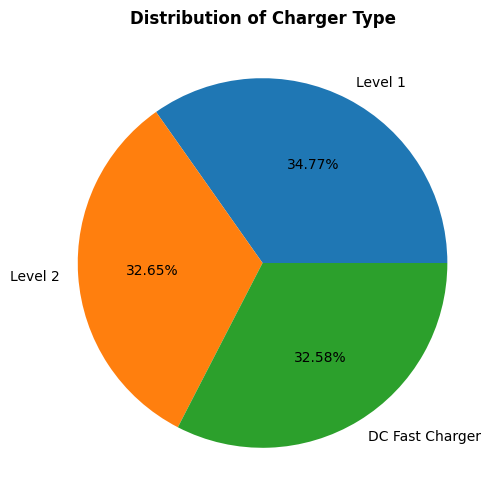

In [21]:
plt.figure(figsize=(6,6))
labels = distributation_Charger_Type['Charger Type']

plt.pie(distributation_Charger_Type['count'] , labels=labels , autopct='%1.2f%%')

plt.title("Distribution of Charger Type", fontdict={'fontsize':12,'fontweight':'bold'})

plt.show()

# Distributation of User Type

In [22]:
distributation_User_Type = ev_charging_df['User Type'].value_counts().reset_index()

distributation_User_Type

,User Type,count
0,Commuter,476
1,Long-Distance Traveler,437
2,Casual Driver,407


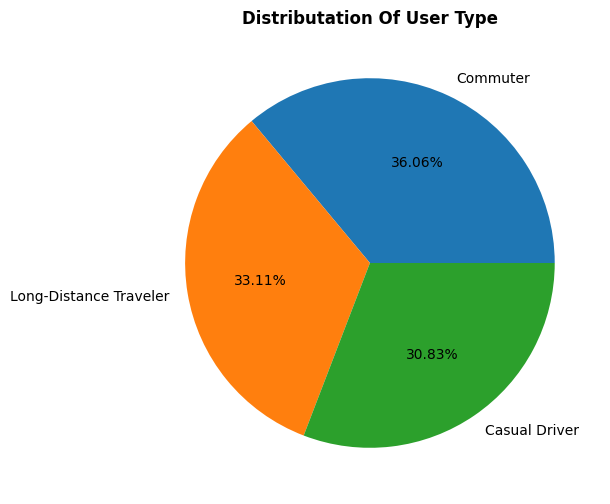

In [23]:
plt.figure(figsize=(6,6))
labels = distributation_User_Type['User Type']
plt.pie(distributation_User_Type['count'], labels=labels, autopct='%1.2f%%')

plt.title("Distributation Of User Type",fontdict={'fontsize':12,'fontweight':'bold'})
plt.show()

# Analysis by Vehicle Model

**Question**

1 -> What is the average battery capacity (kWh) for each vehicle model?

2 -> Do different user types exhibit distinct preferences for vehicle models in the dataset?

3 -> How does the state of charge at the start and end of charging sessions vary by vehicle model?

4 -> What is the average charging duration and energy consumed by different car model?

5 -> What is the average operating temperature for each vehicle model in the dataset during charging time ?

6 -> What is the average charging cost for each vehicle model in the dataset?

***Vehicle Model Type***

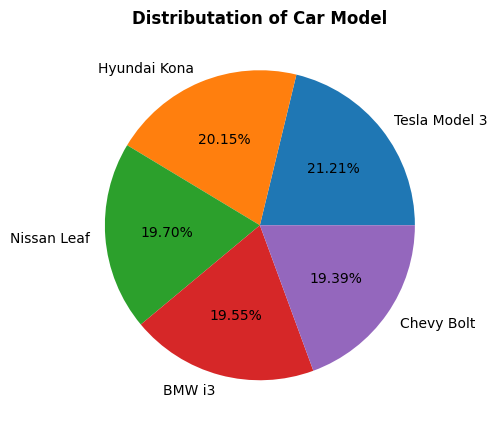

In [24]:
plt.figure(figsize=(5,10))
labels = distributation_of_vehicle_model['Vehicle Model']

plt.pie(distributation_of_vehicle_model['count'], labels = labels ,  autopct='%1.2f%%')
plt.title("Distributation of Car Model",fontdict={'fontsize':12,'fontweight':'bold'})

plt.show()

**Question 1**

What is the average battery capacity (kWh) for each vehicle model?

In [25]:
average_Battery_Capacity_by_Car_Model = (ev_charging_df.groupby('Vehicle Model')['Battery Capacity (kWh)'].mean()).round(2).sort_values().reset_index()

average_Battery_Capacity_by_Car_Model

,Vehicle Model,Battery Capacity (kWh)
0,Nissan Leaf,72.84
1,Tesla Model 3,73.80
2,Chevy Bolt,73.91
3,Hyundai Kona,75.40
4,BMW i3,76.78


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10180\1029617389.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Vehicle Model',y='Battery Capacity (kWh)',data=average_Battery_Capacity_by_Car_Model,palette='Reds_d')


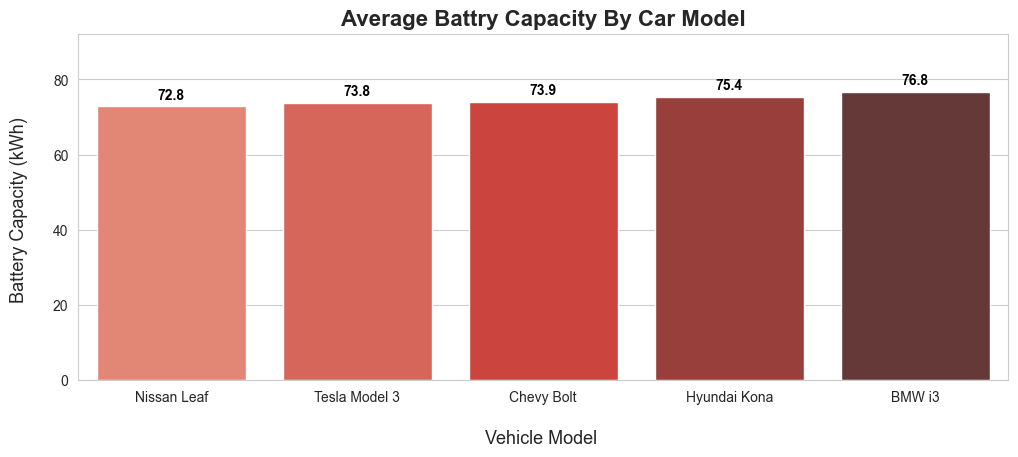

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,4.5))

bar_plot = sns.barplot(x='Vehicle Model',y='Battery Capacity (kWh)',data=average_Battery_Capacity_by_Car_Model,palette='Reds_d')

for index,row in average_Battery_Capacity_by_Car_Model.iterrows():
    bar_plot.text(row.name, row['Battery Capacity (kWh)'] + 2, round(row['Battery Capacity (kWh)'], 1), color='black', ha="center", fontweight='bold')
    
plt.xlabel("Vehicle Model ",fontdict={'fontsize':13},labelpad=18)
plt.ylabel("Battery Capacity (kWh) ",fontdict={'fontsize':13},labelpad=18)
plt.title("Average Battry Capacity By Car Model",fontdict={'fontsize':16,'fontweight':'bold'})
    
max_value = average_Battery_Capacity_by_Car_Model.select_dtypes(include='number').max().max()
plt.ylim(0,max_value + max_value * 0.2)
plt.show()


**Conclusion**

The **BMW i3** has the **highest battery capacity at 76.78 kWh**, followed by the **Hyundai Kona** at **75.40 kWh.** The **Chevy Bolt** and **Tesla Model 3** have similar capacities, **with 73.91 kWh and 73.80 kWh** respectively, while the **Nissan Leaf** has the smallest capacity at **72.84 kWh.**

**Question2**

Do different user types exhibit distinct preferences for vehicle models in the dataset?

In [27]:
ev_charging_df.sample(3)

user_type_by_car_model = (ev_charging_df.groupby('Vehicle Model')['User Type'].value_counts(normalize=True).unstack() * 100).reset_index()
user_type_by_car_model

User Type,Vehicle Model,Casual Driver,Commuter,Long-Distance Traveler
0,BMW i3,32.558140,34.496124,32.945736
1,Chevy Bolt,25.781250,41.015625,33.203125
2,Hyundai Kona,31.954887,34.210526,33.834586
3,Nissan Leaf,30.769231,34.615385,34.615385
4,Tesla Model 3,32.857143,36.071429,31.071429


In [28]:
# Melt the user_type_by_car_model

melted_user_type_by_car_model = user_type_by_car_model.melt(id_vars='Vehicle Model',var_name='User Type',value_name='Customer(%)')

melted_user_type_by_car_model


,Vehicle Model,User Type,Customer(%)
0,BMW i3,Casual Driver,32.558140
1,Chevy Bolt,Casual Driver,25.781250
2,Hyundai Kona,Casual Driver,31.954887
3,Nissan Leaf,Casual Driver,30.769231
4,Tesla Model 3,Casual Driver,32.857143
5,BMW i3,Commuter,34.496124
6,Chevy Bolt,Commuter,41.015625
7,Hyundai Kona,Commuter,34.210526
8,Nissan Leaf,Commuter,34.615385
9,Tesla Model 3,Commuter,36.071429


41.015625


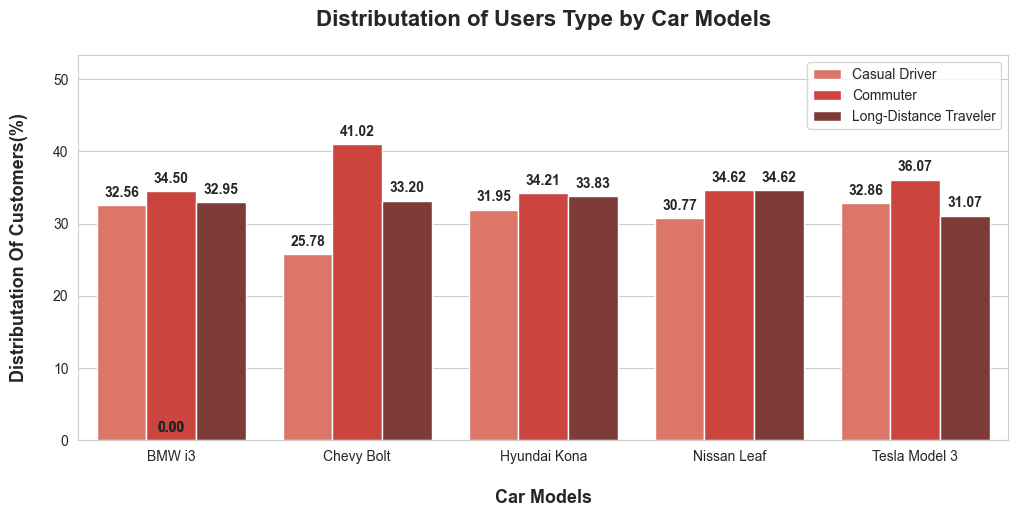

In [29]:
plt.figure(figsize=(12,5))

max_value = melted_user_type_by_car_model.select_dtypes(include='number').max().max()

print(max_value)

bar_plot = sns.barplot(x='Vehicle Model',y='Customer(%)',hue='User Type',data=melted_user_type_by_car_model, palette='Reds_d')

plt.xlabel("Car Models",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.ylabel("Distributation Of Customers(%)",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.title('Distributation of Users Type by Car Models',fontdict={'fontsize':16,'fontweight':'bold'},pad=21)
plt.ylim(0,max_value + max_value*0.3)

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', fontweight='bold',
                     xytext = (0, 9),  # Offset label slightly above the bar
                     textcoords = 'offset points')
    

plt.legend(loc=1)

plt.show()



**Conclusion**

**Casual Drivers** prefer the **Tesla Model 3** the most, with **32.86%**, closely followed by the **BMW i3 at 32.56%**.

**Commuters** show the highest preference for the **Chevy Bolt at 41.02%,** which is significantly higher than other models.

**Long-Distance Travelers** are more evenly distributed across models, with the **Nissan Leaf** being the most popular choice at **34.62%**, while the **Tesla Model 3** has the **lowest** share for this group at **31.07%.**

**Question 3**

How does the state of charge at the start and end of charging sessions vary by vehicle model?

In [30]:
ev_charging_df[['Vehicle Model','State of Charge (Start %)','State of Charge (End %)']]
Soc_Summary_by_Car_Models = ev_charging_df.groupby('Vehicle Model')[['State of Charge (Start %)','State of Charge (End %)']].mean().reset_index().round(2)

Soc_Summary_by_Car_Models

,Vehicle Model,State of Charge (Start %),State of Charge (End %)
0,BMW i3,49.82,75.30
1,Chevy Bolt,49.43,73.97
2,Hyundai Kona,50.52,75.40
3,Nissan Leaf,48.15,76.08
4,Tesla Model 3,47.81,74.95


In [31]:
# Melt the Soc_Summar

melt_Soc_Summary_by_Car_Models = Soc_Summary_by_Car_Models.melt(id_vars='Vehicle Model',var_name='Start or End',value_name='Charging State')
melt_Soc_Summary_by_Car_Models

,Vehicle Model,Start or End,Charging State
0,BMW i3,State of Charge (Start %),49.82
1,Chevy Bolt,State of Charge (Start %),49.43
2,Hyundai Kona,State of Charge (Start %),50.52
3,Nissan Leaf,State of Charge (Start %),48.15
4,Tesla Model 3,State of Charge (Start %),47.81
5,BMW i3,State of Charge (End %),75.30
6,Chevy Bolt,State of Charge (End %),73.97
7,Hyundai Kona,State of Charge (End %),75.40
8,Nissan Leaf,State of Charge (End %),76.08
9,Tesla Model 3,State of Charge (End %),74.95


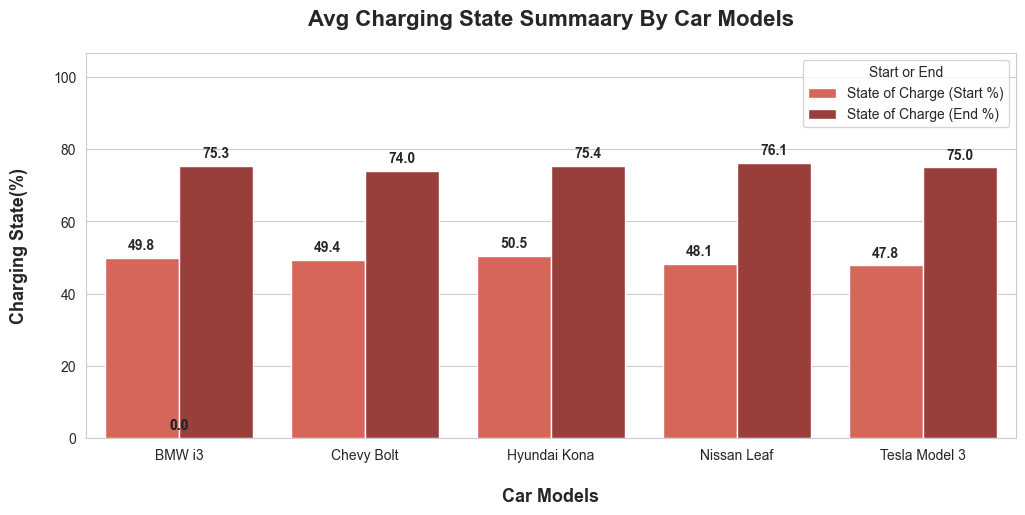

In [32]:
plt.figure(figsize=(12,5))

max_value = melt_Soc_Summary_by_Car_Models.select_dtypes(include='number').max().max()

bar_plot = sns.barplot(x='Vehicle Model',y='Charging State',hue='Start or End',data=melt_Soc_Summary_by_Car_Models,palette='Reds_d')
plt.ylim(0,max_value+max_value*0.4)
plt.xlabel("Car Models",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.ylabel("Charging State(%)",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.title("Avg Charging State Summaary By Car Models",pad=20,fontdict={'fontsize':16,'fontweight':'bold'})

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', fontweight='bold',
                     xytext = (0, 9),  # Offset label slightly above the bar
                     textcoords = 'offset points')



plt.show()

***Conclusion***

Overall, there is not a significant difference in the starting SoC across the models, with values ranging between **47.81% and 50.52%**.

The ending SoC is generally similar across models, mostly in the range of **73.97% to 76.08%**, indicating a consistent charging pattern where users aim for a similar level of charge regardless of the vehicle model.

**Question 4**

What is the average charging duration and energy consumed by different car model?

In [33]:
ev_charging_df[['Vehicle Model','Claculated Duration Time(Hour)','Energy Consumed (kWh)']]
Avg_charging_duration_energy_consumed =   ev_charging_df.groupby('Vehicle Model')[['Claculated Duration Time(Hour)','Energy Consumed (kWh)']].mean().round(2).reset_index()
Avg_charging_duration_energy_consumed

,Vehicle Model,Claculated Duration Time(Hour),Energy Consumed (kWh)
0,BMW i3,2.26,42.46
1,Chevy Bolt,2.26,40.84
2,Hyundai Kona,2.24,42.82
3,Nissan Leaf,2.16,42.51
4,Tesla Model 3,2.20,44.42


In [34]:
# Melt Avg_charging_duration_energy_consumed 

melt_Avg_charging_duration_energy_consumed = Avg_charging_duration_energy_consumed.melt(id_vars='Vehicle Model',var_name='value_col',value_name='Avg_value')

melt_Avg_charging_duration_energy_consumed

,Vehicle Model,value_col,Avg_value
0,BMW i3,Claculated Duration Time(Hour),2.26
1,Chevy Bolt,Claculated Duration Time(Hour),2.26
2,Hyundai Kona,Claculated Duration Time(Hour),2.24
3,Nissan Leaf,Claculated Duration Time(Hour),2.16
4,Tesla Model 3,Claculated Duration Time(Hour),2.20
5,BMW i3,Energy Consumed (kWh),42.46
6,Chevy Bolt,Energy Consumed (kWh),40.84
7,Hyundai Kona,Energy Consumed (kWh),42.82
8,Nissan Leaf,Energy Consumed (kWh),42.51
9,Tesla Model 3,Energy Consumed (kWh),44.42


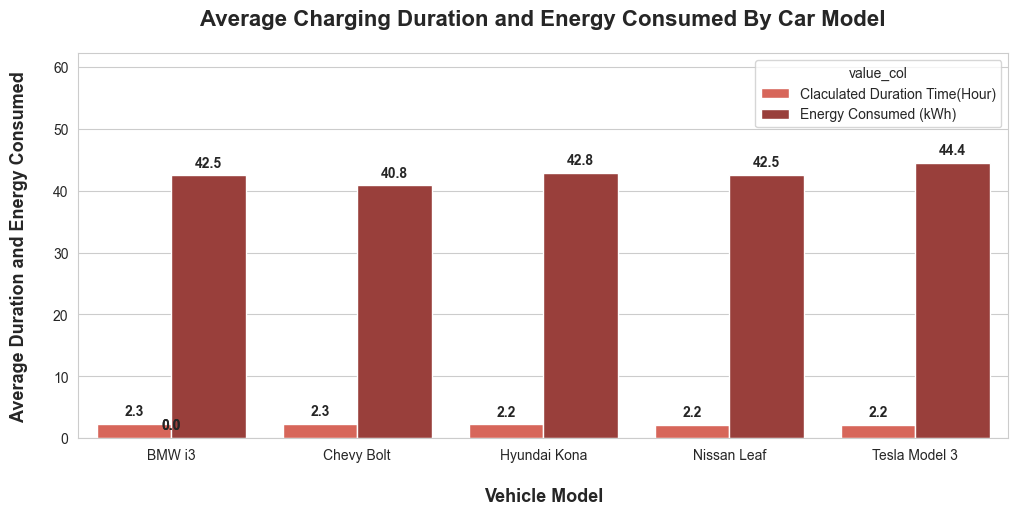

In [35]:
plt.figure(figsize=(12,5))
max_value = melt_Avg_charging_duration_energy_consumed.select_dtypes(include='number').max().max()

bar_plot = sns.barplot(x='Vehicle Model',y='Avg_value',hue='value_col',data=melt_Avg_charging_duration_energy_consumed,palette='Reds_d')
plt.xlabel("Vehicle Model",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.ylabel("Average Duration and Energy Consumed",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.title("Average Charging Duration and Energy Consumed By Car Model",fontdict={'fontsize':16,'fontweight':'bold'},pad=20)
plt.ylim(0,max_value + max_value * 0.4)

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', fontweight='bold',
                     xytext = (0, 9),  # Offset label slightly above the bar
                     textcoords = 'offset points')




plt.show()


**Conclusion**

In this comparison, the Chevy Bolt is the most energy-efficient, consuming the least energy **(40.84 kWh)** for the same duration **(2.26 hours)**. The Tesla Model 3 consumed the most energy **(44.42 kWh)** but likely offers better performance. The other vehicles—BMW i3, Hyundai Kona, and Nissan Leaf—show similar energy consumption **(~42-43 kWh)** with minimal differences in driving duration.

**Question 5**

What is the average operating temperature for each vehicle model in the dataset during charging time ?

In [36]:
ev_charging_df[['Vehicle Model','Temperature (°C)']]

Average_Temperature_by_car_model = ev_charging_df.groupby('Vehicle Model')['Temperature (°C)'].mean().round(2).reset_index().sort_values(by='Temperature (°C)')
Average_Temperature_by_car_model

,Vehicle Model,Temperature (°C)
0,BMW i3,14.61
1,Chevy Bolt,14.94
3,Nissan Leaf,15.22
4,Tesla Model 3,15.28
2,Hyundai Kona,16.23


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10180\4079902129.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Vehicle Model',y='Temperature (°C)',data=Average_Temperature_by_car_model,palette='Reds_d')


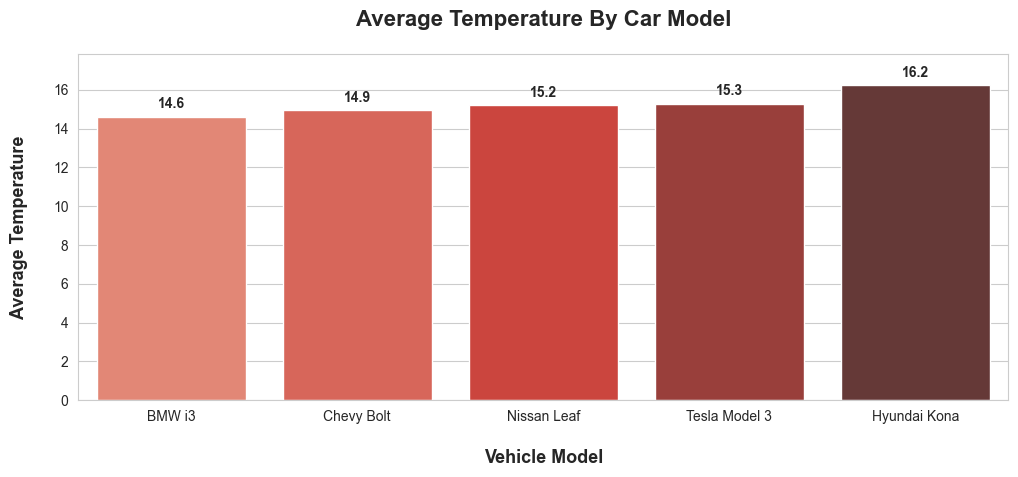

In [37]:
plt.figure(figsize=(12,4.5))

max_value = Average_Temperature_by_car_model.select_dtypes(include='number').max().max()

bar_plot = sns.barplot(x='Vehicle Model',y='Temperature (°C)',data=Average_Temperature_by_car_model,palette='Reds_d')

plt.xlabel("Vehicle Model",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.ylabel("Average Temperature",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.title("Average Temperature By Car Model",fontdict={'fontsize':16,'fontweight':'bold'},pad=20)

plt.ylim(0, max_value + max_value*0.1)

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', fontweight='bold',
                     xytext = (0, 9),  # Offset label slightly above the bar
                     textcoords = 'offset points')


plt.show()

**Conclusion**

During charging, the Hyundai Kona exhibited the highest average temperature **(16.23°C)**, while the BMW i3 had the lowest **(14.61°C)**. The Tesla Model 3, Nissan Leaf, and Chevy Bolt showed intermediate temperatures, ranging from **14.94°C to 15.28°C**.

**Question 6**

What is the average charging cost for each vehicle model in the dataset?

In [38]:
Avg_charging_cost_by_car_model = ev_charging_df.groupby('Vehicle Model')['Charging Cost (USD)'].mean().round(2).reset_index().sort_values('Charging Cost (USD)')

Avg_charging_cost_by_car_model

,Vehicle Model,Charging Cost (USD)
0,BMW i3,20.78
1,Chevy Bolt,22.26
4,Tesla Model 3,22.58
2,Hyundai Kona,23.44
3,Nissan Leaf,23.65


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10180\897133388.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Vehicle Model',y='Charging Cost (USD)',data=Avg_charging_cost_by_car_model,palette='Reds_d')


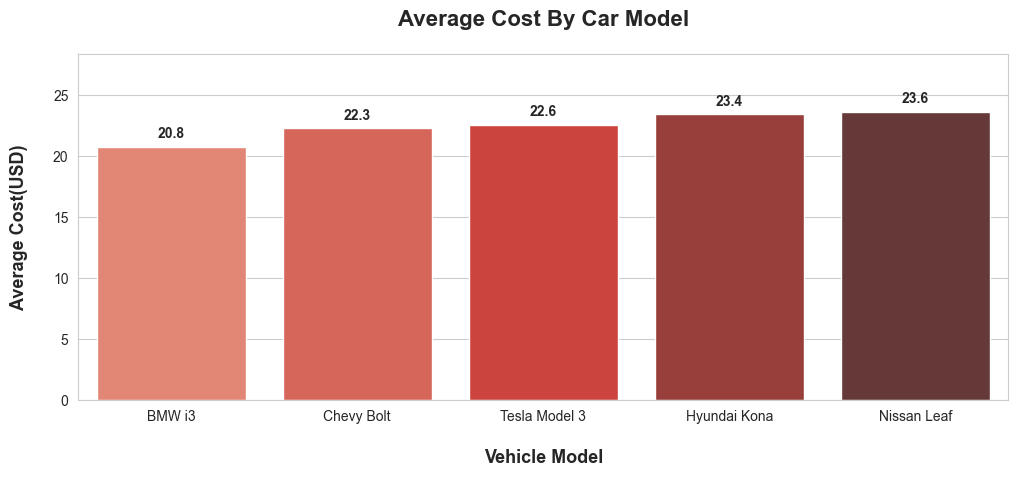

In [39]:
plt.figure(figsize=(12,4.5))

max_value = Avg_charging_cost_by_car_model.select_dtypes(include='number').max().max()

bar_plot = sns.barplot(x='Vehicle Model',y='Charging Cost (USD)',data=Avg_charging_cost_by_car_model,palette='Reds_d')

plt.xlabel("Vehicle Model",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.ylabel("Average Cost(USD)",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.title("Average Cost By Car Model",fontdict={'fontsize':16,'fontweight':'bold'},pad=20)

plt.ylim(0, max_value + max_value*0.2)

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', fontweight='bold',
                     xytext = (0, 9),  # Offset label slightly above the bar
                     textcoords = 'offset points')


plt.show()

**Conclusion**

The *BMW i3* stands out with the lowest average charging cost at **$20.78**, making it the most cost-effective option in this comparison. The *Nissan Leaf* has the highest charging cost at **$23.65**, followed closely by the *Hyundai Kona* at **$23.44**. The *Chevy Bolt and Tesla Model* 3 fall in the mid-range, with costs of **$22.26 and $22.58**, respectively. This shows a moderate variation in charging costs across the different vehicle models.

# Analysis By User Type

**Question**

1 -> What is the average charging cost incurred by each user type in the dataset?

2 -> Which charger types are preferred by each user type in the dataset?

3 -> What is the average charging duration for each user type in the dataset?

4 -> What is the average energy consumed by each user type during a charging session ?

5 -> What times of the day do different user types prefer to charge their vehicles?

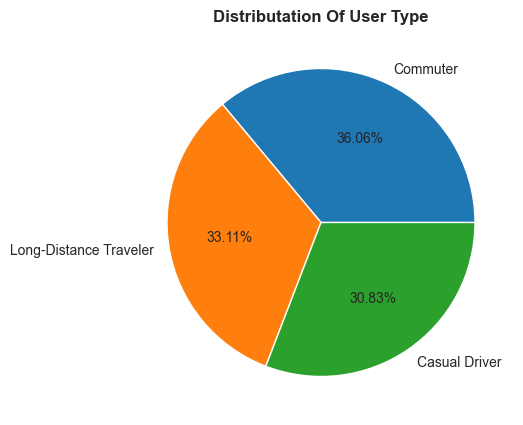

In [40]:
plt.figure(figsize=(5,5))
labels = distributation_User_Type['User Type']
plt.pie(distributation_User_Type['count'], labels=labels, autopct='%1.2f%%')

plt.title("Distributation Of User Type",fontdict={'fontsize':12,'fontweight':'bold'})
plt.show()

**Question 1**

What is the average charging cost incurred by each user type in the dataset?

In [41]:
avg_charging_cost_by_user_type = ev_charging_df.groupby('User Type')['Charging Cost (USD)'].mean().round(2).reset_index().sort_values(by='Charging Cost (USD)')
avg_charging_cost_by_user_type

,User Type,Charging Cost (USD)
2,Long-Distance Traveler,22.21
0,Casual Driver,22.68
1,Commuter,22.75


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10180\3537226184.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='User Type',y='Charging Cost (USD)',data=avg_charging_cost_by_user_type,palette='Reds_d')


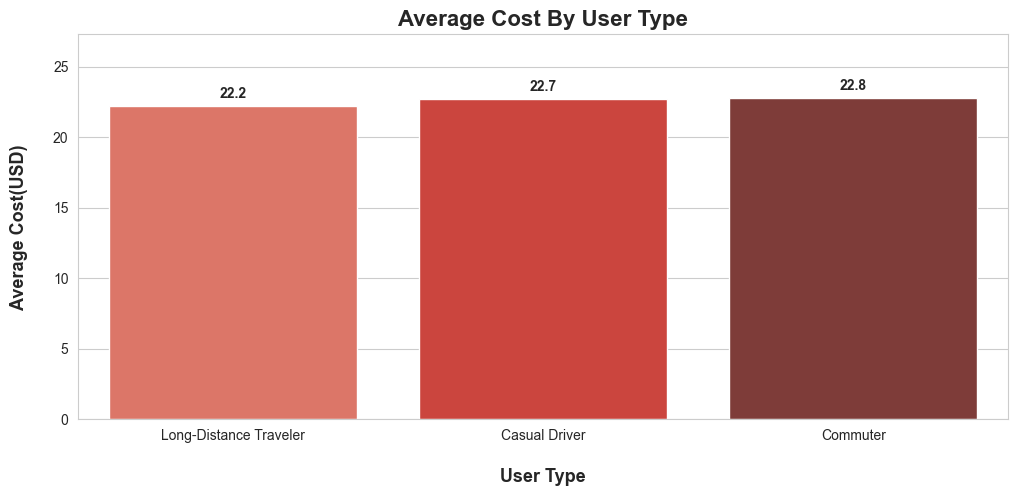

In [42]:
plt.figure(figsize=(12,5))
max_value = avg_charging_cost_by_user_type.select_dtypes(include='number').max().max()

bar_plot = sns.barplot(x='User Type',y='Charging Cost (USD)',data=avg_charging_cost_by_user_type,palette='Reds_d')
plt.xlabel("User Type",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.ylabel("Average Cost(USD)",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.title("Average Cost By User Type",fontdict={'fontsize':16,'fontweight':'bold'})
plt.ylim(0,max_value + max_value * 0.2)

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', fontweight='bold',
                     xytext = (0, 9),  # Offset label slightly above the bar
                     textcoords = 'offset points')


plt.show()

**Conclusion**

Commuters have the highest average charging cost at $22.75, followed closely by casual drivers at $22.68. Long-distance travelers incur the lowest average cost, paying $22.21 for charging. **The differences are minimal, suggesting similar charging expenses across user types.**

**Question 2**

Which charger types are preferred by each user type in the dataset?

In [43]:
distributation_of_chargerType_by_userType = (ev_charging_df.groupby('User Type')['Charger Type'].value_counts(normalize=True).unstack() * 100).round(2).reset_index()
distributation_of_chargerType_by_userType

Charger Type,User Type,DC Fast Charger,Level 1,Level 2
0,Casual Driver,33.91,34.64,31.45
1,Commuter,29.83,33.61,36.55
2,Long-Distance Traveler,34.32,36.16,29.52


In [44]:
# melt the distributation_of_chargerType_by_userType

melt_distributation_of_chargerType_by_userType = distributation_of_chargerType_by_userType.melt(id_vars='User Type',var_name='Charger Type',value_name='Charger Type Values')
melt_distributation_of_chargerType_by_userType

,User Type,Charger Type,Charger Type Values
0,Casual Driver,DC Fast Charger,33.91
1,Commuter,DC Fast Charger,29.83
2,Long-Distance Traveler,DC Fast Charger,34.32
3,Casual Driver,Level 1,34.64
4,Commuter,Level 1,33.61
5,Long-Distance Traveler,Level 1,36.16
6,Casual Driver,Level 2,31.45
7,Commuter,Level 2,36.55
8,Long-Distance Traveler,Level 2,29.52


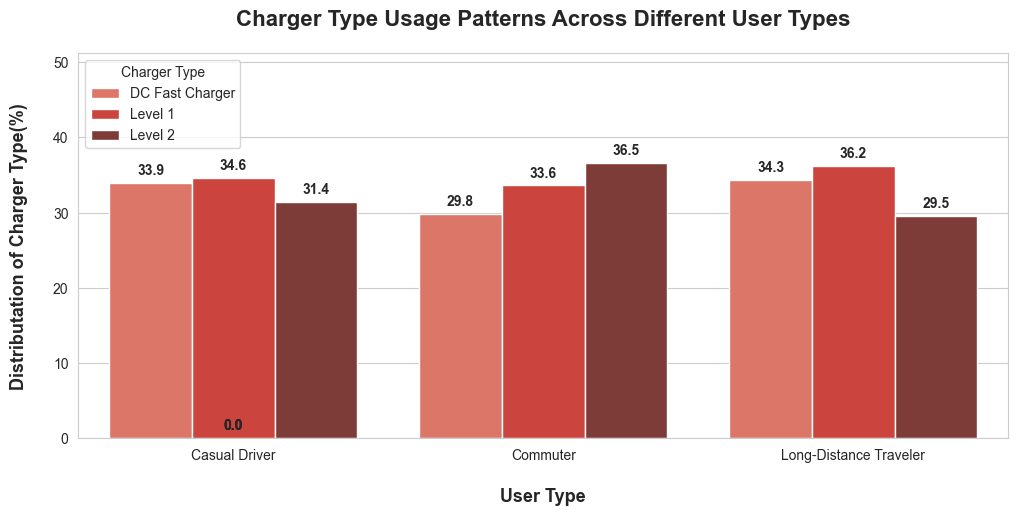

In [45]:
plt.figure(figsize=(12,5))
max_value = melt_distributation_of_chargerType_by_userType.select_dtypes(include='number').max().max()

bar_plot = sns.barplot(x='User Type',y='Charger Type Values',hue='Charger Type',data=melt_distributation_of_chargerType_by_userType,palette='Reds_d')
plt.xlabel("User Type",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.ylabel("Distributation of Charger Type(%)",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.title("Charger Type Usage Patterns Across Different User Types",fontdict={'fontsize':16,'fontweight':'bold'},pad=20)
plt.ylim(0,max_value + max_value * 0.4)

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', fontweight='bold',
                     xytext = (0, 9),  # Offset label slightly above the bar
                     textcoords = 'offset points')

plt.show()


**Conclusion**

**Long-Distance Travelers** tend to use **Level 1 chargers** the most, with **36.16%**, followed closely by DC Fast Chargers at 34.32%. 

**Commuters** prefer **Level 2 chargers**, at **36.55%**, while **Casual Drivers** favor **Level 1 chargers at 34.64%**.

**Question 3**

What is the average charging duration for each user type in the dataset?

In [46]:
average_charging_duration_by_user_type = ev_charging_df.groupby('User Type')['Claculated Duration Time(Hour)'].mean().round(2).reset_index()
average_charging_duration_by_user_type

,User Type,Claculated Duration Time(Hour)
0,Casual Driver,2.28
1,Commuter,2.18
2,Long-Distance Traveler,2.23


2.28


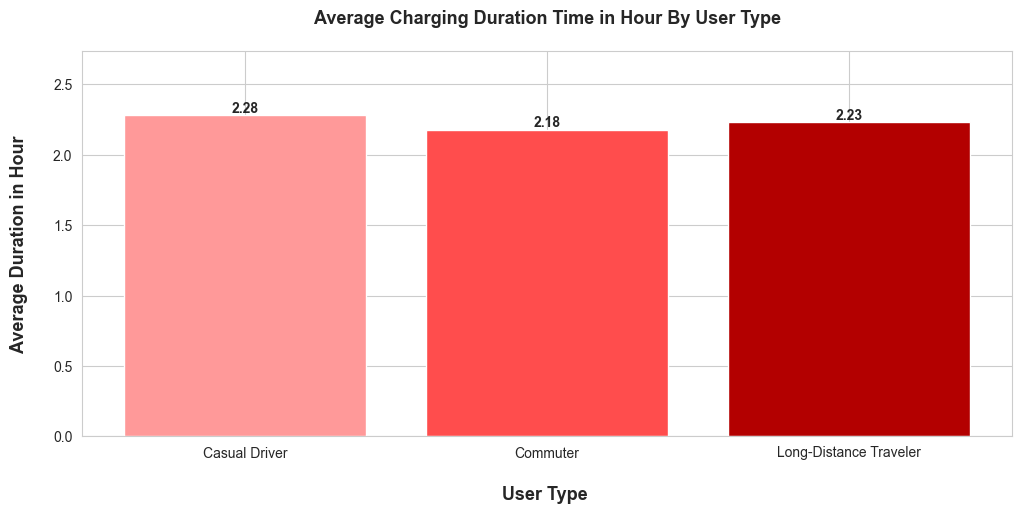

In [47]:
plt.figure(figsize=(12,5))

colors = ['#ff9999', '#ff4d4d', '#b30000']
max_value = average_charging_duration_by_user_type.select_dtypes(include='number').max().max()
print(max_value)

bar_plot = plt.bar( average_charging_duration_by_user_type['User Type'], average_charging_duration_by_user_type['Claculated Duration Time(Hour)'],color=colors)

plt.xlabel('User Type ',fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.ylabel('Average Duration in Hour',fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.title("Average Charging Duration Time in Hour By User Type",fontdict={'fontsize':13,'fontweight':'bold'},pad=20)
plt.ylim(0,max_value+max_value*0.2)

for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom',fontdict={'fontweight':'bold'})



plt.show()


**Conclusion**

Casual drivers have the longest average charging duration at **2.28 hours**, followed by long-distance travelers at **2.23** hours. Commuters have the shortest average duration, charging for **2.18** hours. The differences are minimal, indicating similar charging times across all user types.

**Question 4**

What is the average energy consumed by each user type during a charging session ?

In [48]:
average_energy_consumed_by_user_type = ev_charging_df.groupby('User Type')['Energy Consumed (kWh)'].mean().round(2).reset_index()
average_energy_consumed_by_user_type

,User Type,Energy Consumed (kWh)
0,Casual Driver,44.40
1,Commuter,41.41
2,Long-Distance Traveler,42.34


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10180\1739296709.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='User Type',y='Energy Consumed (kWh)',data=average_energy_consumed_by_user_type,palette="Reds_d")


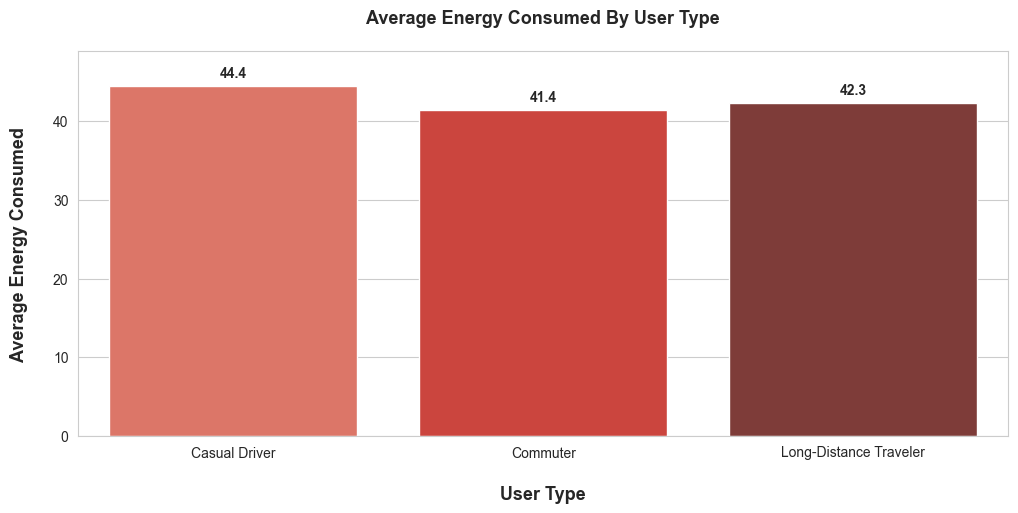

In [49]:
plt.figure(figsize=(12,5))
max_value = average_energy_consumed_by_user_type.select_dtypes(include='number').max().max()

bar_plot = sns.barplot(x='User Type',y='Energy Consumed (kWh)',data=average_energy_consumed_by_user_type,palette="Reds_d")

plt.xlabel('User Type',fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.ylabel('Average Energy Consumed',fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.title("Average Energy Consumed By User Type",fontdict={'fontsize':13,'fontweight':'bold'},pad=20)
plt.ylim(0 , max_value + max_value * 0.10)

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', fontweight='bold',
                     xytext = (0, 9),  # Offset label slightly above the bar
                     textcoords = 'offset points')

plt.show()

**Conclusion**

*Casual drivers* consume the most energy at **44.40 kWh**, while *commuters* use the least at **41.41 kWh**. *Long-distance travelers* fall in between, consuming **42.34 kWh**. The data suggests that casual drivers tend to use slightly more energy compared to other user types.

**Question 5**

What times of the day do different user types prefer to charge their vehicles?

In [50]:
preferred_charging_time_by_user_type = (ev_charging_df.groupby('User Type')['Time of Day'].value_counts(normalize=True).unstack() * 100).reset_index()
preferred_charging_time_by_user_type

Time of Day,User Type,Afternoon,Evening,Morning,Night
0,Casual Driver,22.604423,26.289926,26.781327,24.324324
1,Commuter,24.369748,28.151261,25.420168,22.058824
2,Long-Distance Traveler,23.340961,27.688787,24.256293,24.713959


In [51]:
# Melt the preferred_charging_time_by_user_type

melt_preferred_charging_time_by_user_type = preferred_charging_time_by_user_type.melt(id_vars='User Type',var_name='Day Time',value_name='Average Value')
melt_preferred_charging_time_by_user_type

,User Type,Day Time,Average Value
0,Casual Driver,Afternoon,22.604423
1,Commuter,Afternoon,24.369748
2,Long-Distance Traveler,Afternoon,23.340961
3,Casual Driver,Evening,26.289926
4,Commuter,Evening,28.151261
5,Long-Distance Traveler,Evening,27.688787
6,Casual Driver,Morning,26.781327
7,Commuter,Morning,25.420168
8,Long-Distance Traveler,Morning,24.256293
9,Casual Driver,Night,24.324324


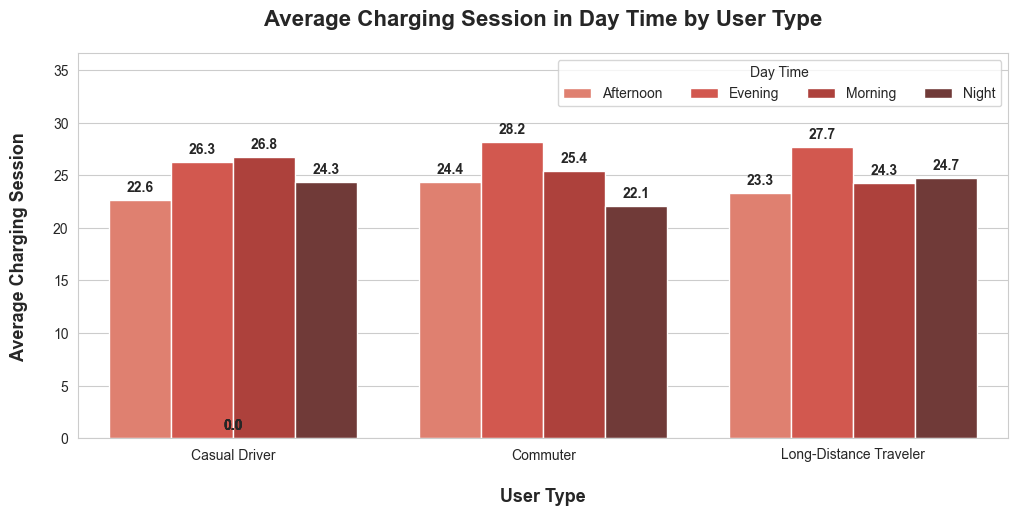

In [52]:
plt.figure(figsize=(12,5))
max_value = melt_preferred_charging_time_by_user_type.select_dtypes(include='number').max().max()

bar_plot = sns.barplot(x='User Type',y='Average Value',hue='Day Time',data=melt_preferred_charging_time_by_user_type,palette='Reds_d')

plt.xlabel('User Type',fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.ylabel('Average Charging Session',fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.title('Average Charging Session in Day Time by User Type',fontdict={'fontsize':16,'fontweight':'bold'},pad=20)
plt.ylim(0, max_value + max_value * 0.3)
plt.legend(title='Day Time',ncol=4)

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', fontweight='bold',
                     xytext = (0, 9),  # Offset label slightly above the bar
                     textcoords = 'offset points')


plt.show()

**Conclusion**

Commuters prefer to charge in the **evening (28.15%)**, while **casual drivers and long-distance** travelers show similar preferences for **morning and evening** charging. **Night charging** is the least preferred for all user types, with **commuters** charging the least during this time **(22.06%)**. Overall, **evening** is the most common charging time across all user types.

# Analysis By Charger Type

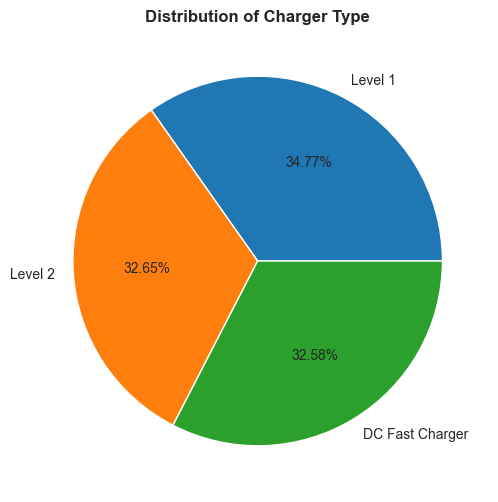

In [53]:
plt.figure(figsize=(6,6))
labels = distributation_Charger_Type['Charger Type']
plt.pie(distributation_Charger_Type['count'] , labels=labels , autopct='%1.2f%%')
plt.title("Distribution of Charger Type", fontdict={'fontsize':12,'fontweight':'bold'})
plt.show()

**Questions**

1 -> What is the average temperature during charging for each charger type ?

2 -> What is the average charging duration for each charger type ?

3 -> Which charger type is most commonly used by each vehicle model ?

4 -> What is the average distance driven since the last charge for each charger type ?

5 -> What is the average charging cost for each charger type ?

6 -> Which charger type is most commonly available at each charging station location ?

**Question 1**

What is the average temperature during charging for each charger type ?

In [54]:
average_temperature_by_charger_type = ev_charging_df.groupby('Charger Type')['Temperature (°C)'].mean().round(2).reset_index()
average_temperature_by_charger_type

,Charger Type,Temperature (°C)
0,DC Fast Charger,15.00
1,Level 1,15.37
2,Level 2,15.41


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10180\2247131365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Temperature (°C)',y='Charger Type',data=average_temperature_by_charger_type,orient='h',palette='Reds_d')


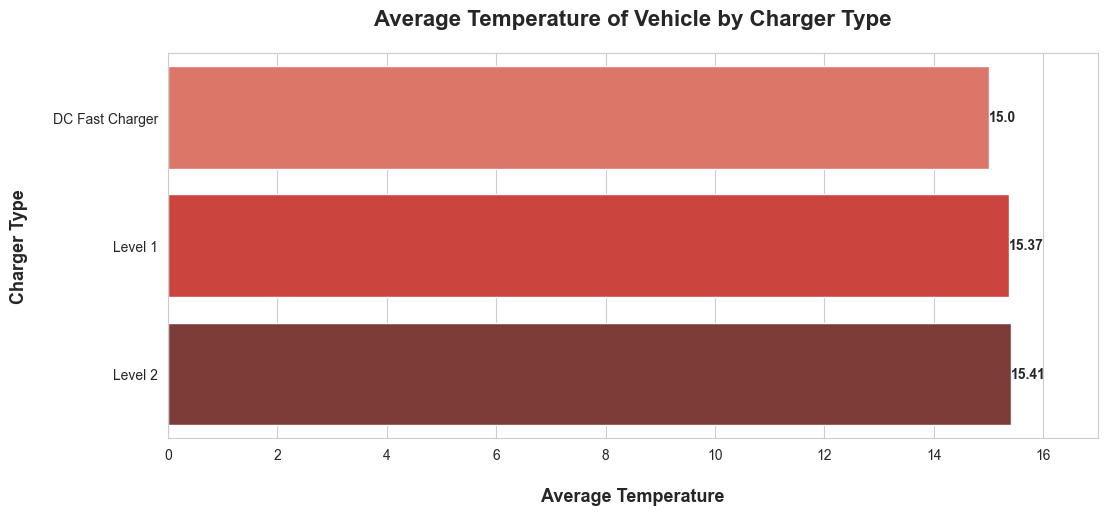

In [55]:
plt.figure(figsize=(12,5))

bar_plot = sns.barplot(x='Temperature (°C)',y='Charger Type',data=average_temperature_by_charger_type,orient='h',palette='Reds_d')

plt.xlabel("Average Temperature",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.ylabel("Charger Type",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.title("Average Temperature of Vehicle by Charger Type",pad=20,fontdict={'fontsize':16,'fontweight':'bold'})
plt.xlim(0,17)

for index, value in enumerate(average_temperature_by_charger_type['Temperature (°C)']):
    plt.text(value, index, f'{value}', va='center',fontdict={'fontweight':'bold'})

plt.show()

**Conclusion**

All charger types **show very similar temperatures during charging**, with minimal variation. Level 2 has the highest average temperature at 15.41°C, and DC Fast Chargers the lowest at 15.00°C. The small differences suggest that **temperature is relatively consistent across charger types**.

**Question 2**

What is the average charging duration for each charger type ?

In [56]:
average_charging_duration_by_charger_type = ev_charging_df.groupby('Charger Type')['Claculated Duration Time(Hour)'].mean().round(2).reset_index()
average_charging_duration_by_charger_type


,Charger Type,Claculated Duration Time(Hour)
0,DC Fast Charger,2.24
1,Level 1,2.23
2,Level 2,2.21


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10180\789605355.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Claculated Duration Time(Hour)',y='Charger Type',data=average_charging_duration_by_charger_type,orient='h',palette='Reds_d')


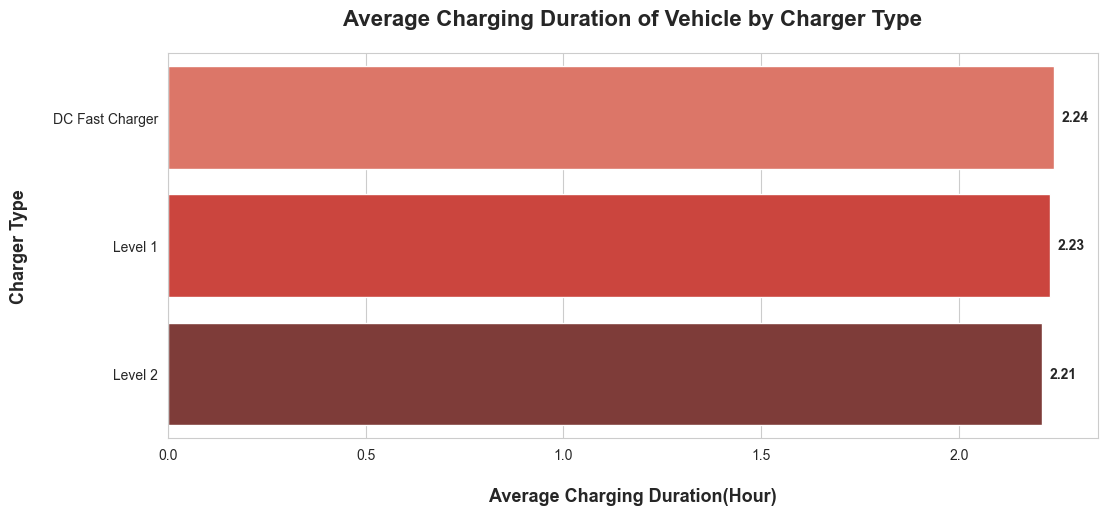

In [57]:
plt.figure(figsize=(12,5))

bar_plot = sns.barplot(x='Claculated Duration Time(Hour)',y='Charger Type',data=average_charging_duration_by_charger_type,orient='h',palette='Reds_d')

plt.xlabel("Average Charging Duration(Hour)",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.ylabel("Charger Type",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.title("Average Charging Duration of Vehicle by Charger Type",pad=20,fontdict={'fontsize':16,'fontweight':'bold'})
# plt.xlim(0,17)

for index, value in enumerate(average_charging_duration_by_charger_type['Claculated Duration Time(Hour)']):
    plt.text(value + 0.02, index, f'{value}', va='center',fontdict={'fontweight':'bold'})

plt.show()

**Conclusion**

DC Fast Chargers have the longest average charging duration at 2.24 hours, followed closely by Level 1 at 2.23 hours and Level 2 at 2.21 hours. The differences are minimal, **indicating similar charging times across all charger types.**

**Question 3**

Which charger type is most commonly used by each vehicle model ?

In [58]:
ev_charging_df.sample(4)

charger_type_uses_by_vehicle_model = ev_charging_df.groupby(['Vehicle Model','Charger Type']).size().reset_index(name="Total Users")
charger_type_uses_by_vehicle_model

,Vehicle Model,Charger Type,Total Users
0,BMW i3,DC Fast Charger,77
1,BMW i3,Level 1,82
2,BMW i3,Level 2,99
3,Chevy Bolt,DC Fast Charger,80
4,Chevy Bolt,Level 1,89
5,Chevy Bolt,Level 2,87
6,Hyundai Kona,DC Fast Charger,93
7,Hyundai Kona,Level 1,99
8,Hyundai Kona,Level 2,74
9,Nissan Leaf,DC Fast Charger,91


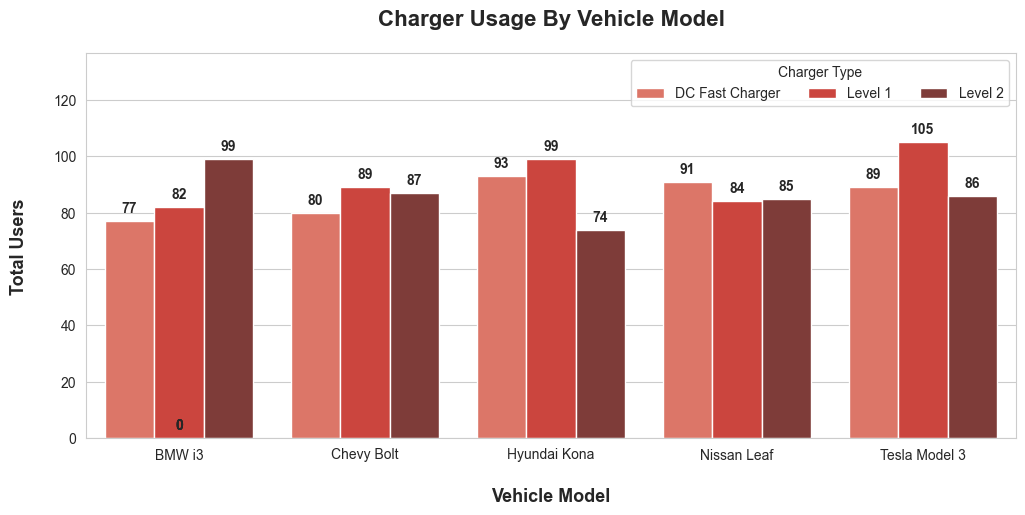

In [59]:
plt.figure(figsize=(12,5))
max_value = charger_type_uses_by_vehicle_model.select_dtypes(include='number').max().max()

bar_plot = sns.barplot(y='Total Users',x='Vehicle Model',hue='Charger Type',data=charger_type_uses_by_vehicle_model,palette='Reds_d')

plt.xlabel("Vehicle Model",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.ylabel("Total Users",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.title("Charger Usage By Vehicle Model",fontdict={'fontsize':16,'fontweight':'bold'},pad=20)
plt.ylim(0,max_value + max_value * 0.3)
plt.legend(title='Charger Type',ncol=3)

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', fontweight='bold',
                     xytext = (0, 9),  # Offset label slightly above the bar
                     textcoords = 'offset points')

plt.show()

**Conclusion**

Owners of the **BMW i3** (total users: 258) tend to prefer the **Level 2 charger (99 users)** over Level 1 (82 users) and DC Fast Chargers (77 users). **Chevy Bolt users** (total users: 256) **show a relatively balanced preference across all charger types,** with 89 users for Level 1, 87 for Level 2, and 80 for DC Fast Chargers. **Hyundai Kona owners** (total users: 266) most frequently choose **DC Fast Chargers (93 users)**, followed closely by **Level 1 chargers (99 users)**. **Nissan Leaf users** (total users: 260) exhibit a **nearly equal distribution of usage across all charger types**, with 91 users for DC Fast Chargers, 85 for Level 2, and 84 for Level 1. Finally, **Tesla Model 3 owners** (total users: 280) predominantly **prefer Level 1 chargers** (105 users) compared to DC Fast Chargers (89 users) and Level 2 chargers (86 users).

**Question 4**

What is the average distance driven since the last charge for each charger type?

In [60]:
avg_distance_drive_since_last_charg = ev_charging_df.groupby('Charger Type')['Distance Driven (since last charge) (km)'].mean().round(2).reset_index()
avg_distance_drive_since_last_charg

,Charger Type,Distance Driven (since last charge) (km)
0,DC Fast Charger,157.98
1,Level 1,154.42
2,Level 2,148.35


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10180\894456477.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Charger Type',y='Distance Driven (since last charge) (km)',data=avg_distance_drive_since_last_charg,palette='Reds_d')


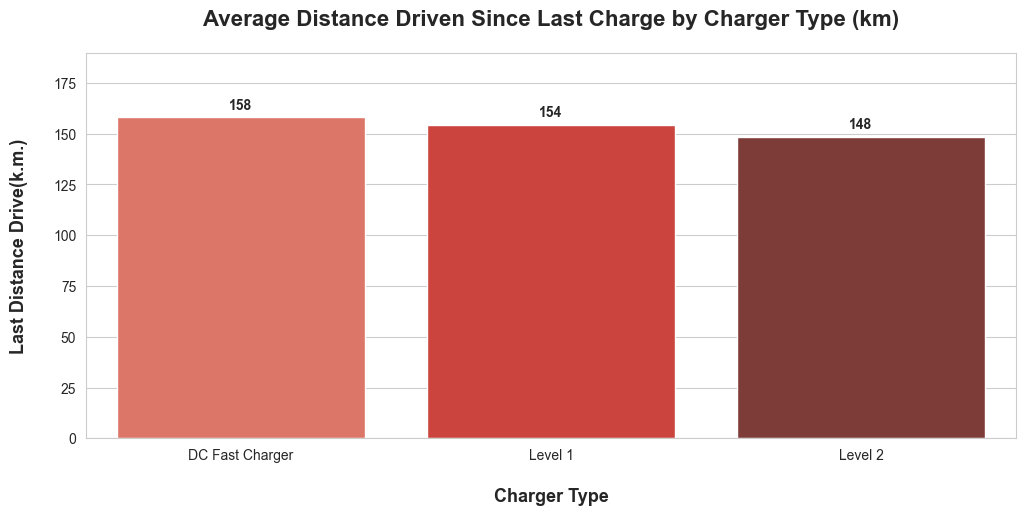

In [61]:
plt.figure(figsize=(12,5))

max_value = avg_distance_drive_since_last_charg.select_dtypes(include='number').max().max()

bar_plot = sns.barplot(x='Charger Type',y='Distance Driven (since last charge) (km)',data=avg_distance_drive_since_last_charg,palette='Reds_d')

plt.xlabel('Charger Type',fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.ylabel('Last Distance Drive(k.m.)',fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.title("Average Distance Driven Since Last Charge by Charger Type (km)",fontdict={'fontsize':16,'fontweight':'bold'},pad=20)
plt.ylim(0,max_value + max_value * 0.2)

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', fontweight='bold',
                     xytext = (0, 9),  # Offset label slightly above the bar
                     textcoords = 'offset points')

plt.show()

**Conclusion**

Vehicles charged using **DC Fast Chargers** tend to drive the longest distance since the last charge, **averaging 157.98 km**, followed by **Level 1 chargers** at **154.42 km**. **Level 2 chargers** are associated with the shortest distance, at **148.35 km**. **The differences suggest that faster chargers may enable slightly longer trips between charges.**

**Question 5**

What is the average charging cost for each charger type?

In [62]:
ev_charging_df.sample(3)
avg_charge_cost_by_charger_type = ev_charging_df.groupby('Charger Type')['Charging Cost (USD)'].mean().round(2).reset_index()
avg_charge_cost_by_charger_type

,Charger Type,Charging Cost (USD)
0,DC Fast Charger,23.60
1,Level 1,21.66
2,Level 2,22.45


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10180\1175442936.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Charger Type',y='Charging Cost (USD)',data=avg_charge_cost_by_charger_type,palette='Reds_d')


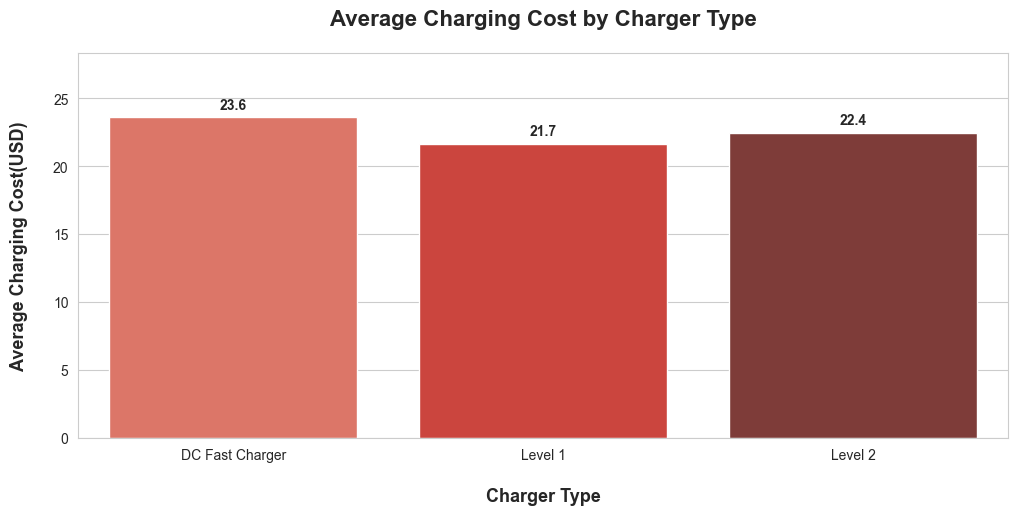

In [63]:
plt.figure(figsize=(12,5))

max_value = avg_charge_cost_by_charger_type.select_dtypes(include='number').max().max()

bar_plot = sns.barplot(x='Charger Type',y='Charging Cost (USD)',data=avg_charge_cost_by_charger_type,palette='Reds_d')

plt.xlabel('Charger Type',fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.ylabel('Average Charging Cost(USD)',fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.title("Average Charging Cost by Charger Type",fontdict={'fontsize':16,'fontweight':'bold'},pad=20)
plt.ylim(0,max_value + max_value * 0.2)

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', fontweight='bold',
                     xytext = (0, 9),  # Offset label slightly above the bar
                     textcoords = 'offset points')

plt.show()

**Conclusion**

**DC Fast Chargers** have the highest average charging cost at **$23.60**, followed by **Level 2** chargers at **$22.45**, and **Level 1** chargers at **$21.66**. Overall, **The average charging cost across all charger types is quite similar, with only a small difference between them.**

In [64]:
ev_charging_df.sample(3)

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),...,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Claculated Duration Time(Hour),Vehicle Age Group
378,User_379,Nissan Leaf,85.0,Station_69,Los Angeles,2024-01-16 18:00:00,2024-01-16 19:54:00,16.67,1.81,32.99,...,Thursday,77.49,88.67,281.89,33.73,6,DC Fast Charger,Long-Distance Traveler,1.90,More than 5
555,User_556,Hyundai Kona,50.0,Station_291,San Francisco,2024-01-24 03:00:00,2024-01-24 06:05:00,12.59,3.42,13.29,...,Friday,70.25,87.17,67.62,34.25,2,DC Fast Charger,Long-Distance Traveler,3.08,0-2
890,User_891,Nissan Leaf,75.0,Station_62,San Francisco,2024-02-07 02:00:00,2024-02-07 04:20:00,41.89,3.74,23.02,...,Wednesday,59.32,94.75,88.92,7.81,3,Level 2,Casual Driver,2.33,3-5


**Question 6**

Which charger type is most commonly available at each charging station location?

In [65]:
charger_type_by_charging_station_location =  ev_charging_df.groupby(['Charging Station Location','Charger Type']).size().reset_index(name='Total Chargers')
charger_type_by_charging_station_location

,Charging Station Location,Charger Type,Total Chargers
0,Chicago,DC Fast Charger,82
1,Chicago,Level 1,84
2,Chicago,Level 2,76
3,Houston,DC Fast Charger,98
4,Houston,Level 1,89
5,Houston,Level 2,75
6,Los Angeles,DC Fast Charger,85
7,Los Angeles,Level 1,106
8,Los Angeles,Level 2,106
9,New York,DC Fast Charger,83


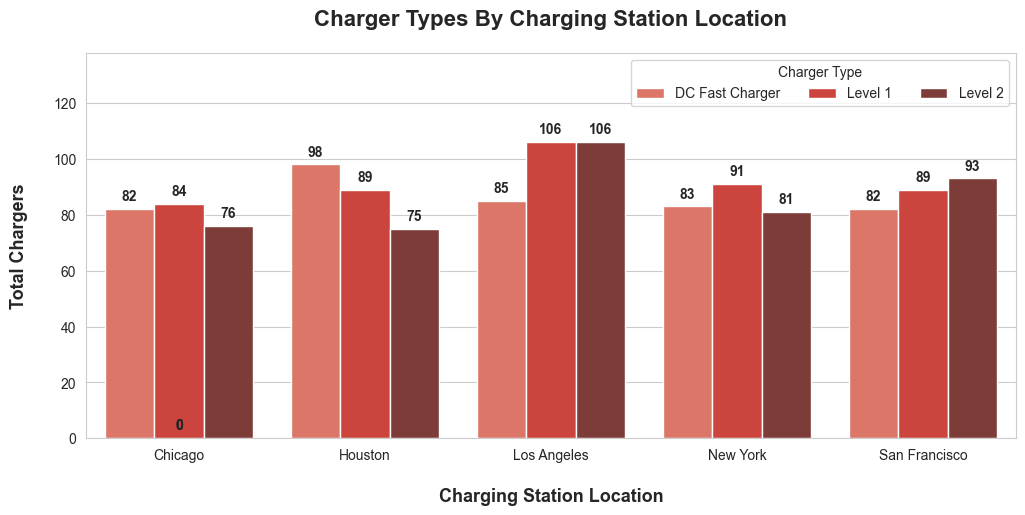

In [66]:
plt.figure(figsize=(12,5))
max_value = charger_type_by_charging_station_location.select_dtypes(include='number').max().max()

bar_plot = sns.barplot(y='Total Chargers',x='Charging Station Location',hue='Charger Type',data=charger_type_by_charging_station_location,palette='Reds_d')

plt.xlabel("Charging Station Location",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.ylabel("Total Chargers",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.title("Charger Types By Charging Station Location",fontdict={'fontsize':16,'fontweight':'bold'},pad=20)
plt.ylim(0,max_value + max_value * 0.3)
plt.legend(title='Charger Type',ncol=3)

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', fontweight='bold',
                     xytext = (0, 9),  # Offset label slightly above the bar
                     textcoords = 'offset points')

plt.show()

**Conclusion**

**In Chicago**, **Level 1 chargers** are the most prevalent, with a total of **8**4, followed closely by DC Fast Chargers at 82.

**In Houston**, **DC Fast Chargers dominate with 98 units**, while Level 1 chargers total 89. 

**Los Angeles has an equal number of Level 1 and Level 2 chargers**, both at **106**, with DC Fast Chargers totaling 85. 

**In New York**, **Level 1** chargers lead with **91**, followed by DC Fast Chargers at 83. Lastly, 

**San Francisco** has **Level 2** chargers as the most available at **93**, while DC Fast Chargers total 82. 

This data indicates a **diverse distribution of charger types** across different charging station locations.

# Correlational and Other Analysis

**Questions**

1 -> What is the correlation between all numeric variables?

2 -> What is the average charging cost associated with each day of the week based on the available data ?

3 -> What is the total charigng cost by time of the day ?

4 -> Does the charging rate differ based on the age of the vehicle ?

5 -> What is the average distance drive dince last charge(KM) based on vechicle age group ?

**Question 1**

What is the correlation between all numeric variables?

In [67]:
correlational_values = ev_charging_df.select_dtypes(include='number').corr()
correlational_values

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Claculated Duration Time(Hour)
Battery Capacity (kWh),1.000000,0.000322,-0.024642,0.015552,-0.000485,-0.072147,-0.011514,-0.040071,-0.036422,0.038859,0.038332
Energy Consumed (kWh),0.000322,1.000000,0.027877,-0.040285,-0.007606,-0.013150,0.000568,-0.026363,-0.017992,0.015903,-0.034618
Charging Duration (hours),-0.024642,0.027877,1.000000,-0.013165,0.015813,-0.026033,0.007022,0.023136,-0.049538,0.000522,0.012389
Charging Rate (kW),0.015552,-0.040285,-0.013165,1.000000,-0.000828,-0.018715,-0.018259,0.030544,0.012472,-0.049389,0.008038
Charging Cost (USD),-0.000485,-0.007606,0.015813,-0.000828,1.000000,-0.008637,-0.063156,-0.008311,0.059852,-0.004617,0.004304
State of Charge (Start %),-0.072147,-0.013150,-0.026033,-0.018715,-0.008637,1.000000,-0.021411,-0.023018,0.037750,0.015763,-0.012334
State of Charge (End %),-0.011514,0.000568,0.007022,-0.018259,-0.063156,-0.021411,1.000000,0.024953,0.022026,0.014768,-0.040372
Distance Driven (since last charge) (km),-0.040071,-0.026363,0.023136,0.030544,-0.008311,-0.023018,0.024953,1.000000,-0.023115,-0.030704,0.022530
Temperature (°C),-0.036422,-0.017992,-0.049538,0.012472,0.059852,0.037750,0.022026,-0.023115,1.000000,0.024661,-0.037948
Vehicle Age (years),0.038859,0.015903,0.000522,-0.049389,-0.004617,0.015763,0.014768,-0.030704,0.024661,1.000000,0.025010


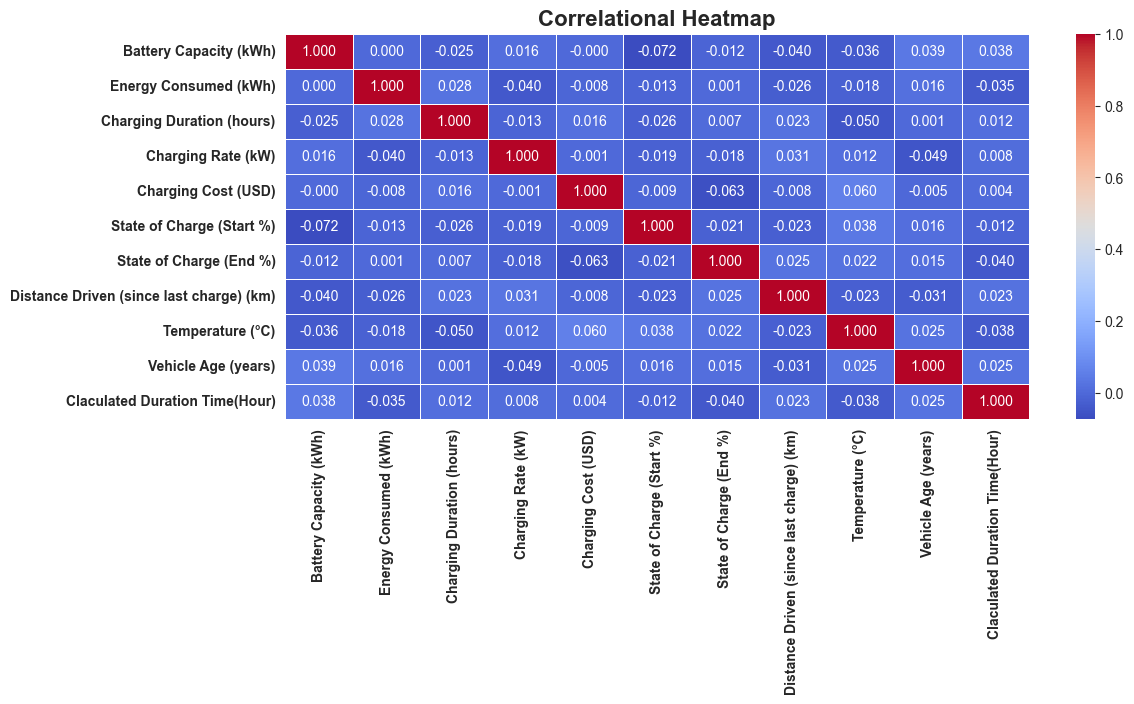

In [68]:
plt.figure(figsize=(12,5))

heat_map = sns.heatmap(correlational_values,annot=True,cmap='coolwarm',fmt=".3f",linewidths=0.5)

plt.title("Correlational Heatmap",fontdict={'fontsize':16,'fontweight':'bold'})
heat_map.set_xticklabels(heat_map.get_xticklabels(),fontdict={'fontweight':'bold'})
heat_map.set_yticklabels(heat_map.get_yticklabels(),fontweight='bold')

plt.show()

**Conclusion**

There are **no strong correlations** between the variables in the dataset. **Most correlation values are close to zero**, indicating weak linear relationships. Notably, 'Temperature (°C)' has a slight positive correlation with 'Charging Cost (USD)' (0.059852), but it is still considered weak. **Therefore, the data does not suggest significant direct relationships between the variables analyzed.**

This suggests that other factors or external variables might be influencing the charging behavior.


**Question 2**

What is the average charging cost associated with each day of the week based on the available data ?

In [69]:
total_cost_by_week_day = ev_charging_df.groupby('Day of Week')['Charging Cost (USD)'].sum().reset_index()

week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
total_cost_by_week_day['Day of Week'] = pd.Categorical(total_cost_by_week_day['Day of Week'],categories=week_order,ordered=True)
total_cost_by_week_day = total_cost_by_week_day.sort_values(by='Day of Week')
total_cost_by_week_day


,Day of Week,Charging Cost (USD)
1,Monday,4137.05
5,Tuesday,4289.93
6,Wednesday,4581.20
4,Thursday,3741.83
0,Friday,4347.99
2,Saturday,4475.18
3,Sunday,4194.52


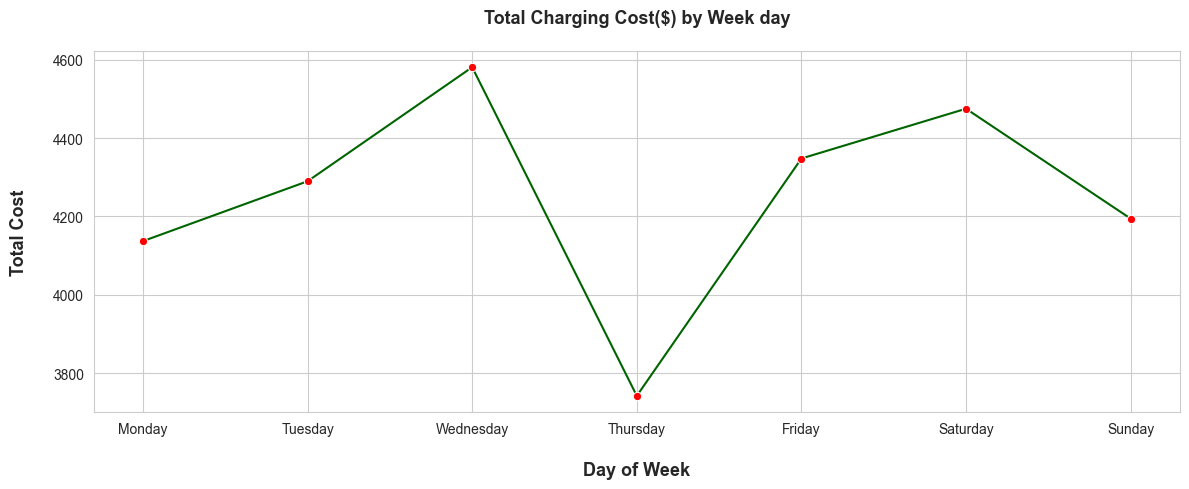

In [70]:
plt.figure(figsize=(12,5))

max_value = total_cost_by_week_day.select_dtypes(include='number').max().max()

line_plot = sns.lineplot(x='Day of Week',y='Charging Cost (USD)',data=total_cost_by_week_day, color='#006400' ,marker='o', markerfacecolor='red')
plt.xlabel("Day of Week",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.ylabel("Total Cost",fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.title("Total Charging Cost($) by Week day",fontdict={'fontsize':13,'fontweight':'bold'},pad=20)
plt.tight_layout()

plt.show()

**Conclusion**

Based on the data, **Wednesday has the highest average charging cost** at **4581.20 USD**, while **Thursday has the lowest** at **3741.83 USD**. The costs vary moderately throughout the week, with no extreme outliers.

**Question 3**

What is the total charigng cost by time of the day ?

In [71]:
total_cost_by_day_time = ev_charging_df.groupby('Time of Day')['Charging Cost (USD)'].sum().sort_values().reset_index()
total_cost_by_day_time

,Time of Day,Charging Cost (USD)
0,Night,6961.30
1,Afternoon,7173.02
2,Morning,7531.15
3,Evening,8102.23


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10180\983774589.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Time of Day',y='Charging Cost (USD)',data=total_cost_by_day_time,palette='Reds_d')


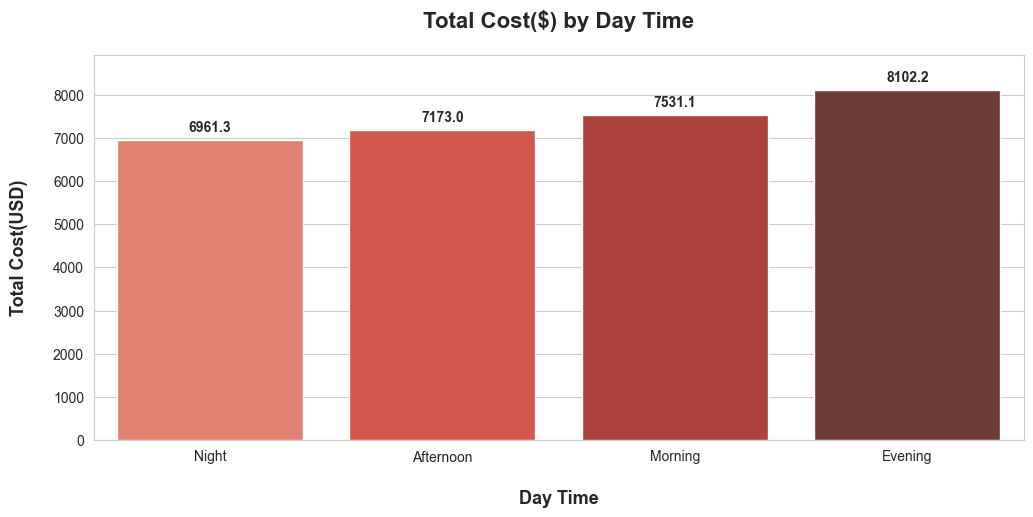

In [72]:
plt.figure(figsize=(12,5))

max_value = total_cost_by_day_time.select_dtypes(include='number').max().max()

bar_plot = sns.barplot(x='Time of Day',y='Charging Cost (USD)',data=total_cost_by_day_time,palette='Reds_d')

plt.xlabel('Day Time',fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.ylabel('Total Cost(USD)',fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.title("Total Cost($) by Day Time",fontdict={'fontsize':16,'fontweight':'bold'},pad=20)
plt.ylim(0,max_value + max_value * 0.1)

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', fontweight='bold',
                     xytext = (0, 9),  # Offset label slightly above the bar
                     textcoords = 'offset points')

plt.show()

**Conclusion**

The data indicates that the **evening has the highest total charging cost** at **8102.23 USD**, followed by the morning with 7531.15 USD. The afternoon and night have lower total costs, with the night being the lowest at 6961.30 USD. This suggests that **most charging activity occurs during the evening**, leading to higher total costs compared to other times of the day.

**Question 4**

Does the Temperature differ based on the age of the vehicle ?

In [73]:
average_temperature_by_vehicle_age_group =  ev_charging_df.groupby('Vehicle Age Group')['Temperature (°C)'].mean().round(2).reset_index()
average_temperature_by_vehicle_age_group

,Vehicle Age Group,Temperature (°C)
0,0-2,14.80
1,3-5,14.92
2,More than 5,16.40


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10180\3718637487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Vehicle Age Group',y='Temperature (°C)',data=average_temperature_by_vehicle_age_group,palette='Reds_d')


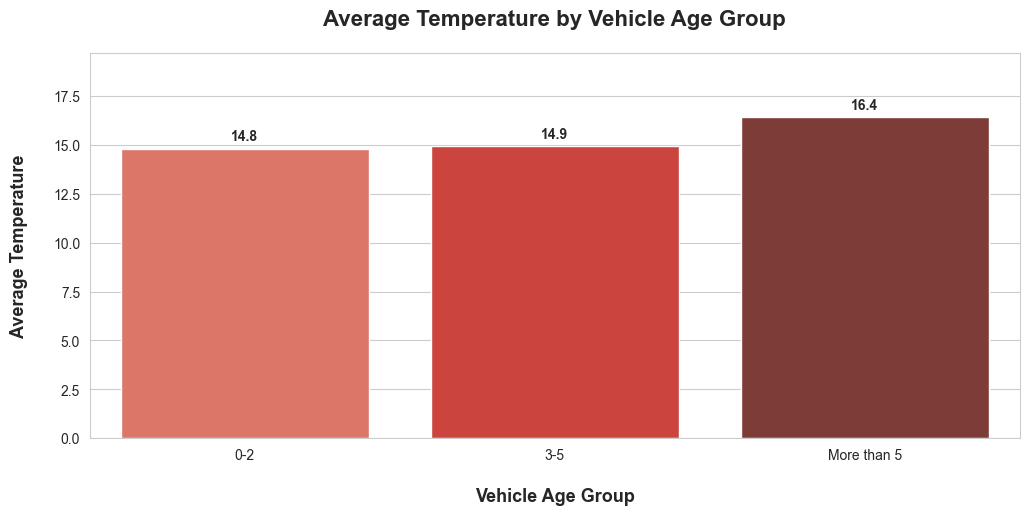

In [74]:
plt.figure(figsize=(12,5))
max_value = average_temperature_by_vehicle_age_group.select_dtypes(include='number').max().max()

bar_plot = sns.barplot(x='Vehicle Age Group',y='Temperature (°C)',data=average_temperature_by_vehicle_age_group,palette='Reds_d')
plt.xlabel('Vehicle Age Group',fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.ylabel('Average Temperature',fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.title("Average Temperature by Vehicle Age Group",fontdict={'fontsize':16,'fontweight':'bold'},pad=20)
plt.ylim(0,max_value + max_value * 0.2)

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', fontweight='bold',
                     xytext = (0, 9),  # Offset label slightly above the bar
                     textcoords = 'offset points')


plt.show()

**Conclusion**

The data indicates that as vehicle age increases, the charging temperature also rises slightly. 

Vehicles aged **0-2 years** have an average temperature of **14.80°C**, while those aged **more than 5 years** experience a higher temperature of **16.40°C**. 

**This suggests that older vehicles may generate more heat during charging.**

**Question 5**

What is the average distance drive dince last charge(KM) based on vechicle age group ?

In [75]:
avg_distance_drive_since_last_charging_by_vehicle_age_group = ev_charging_df.groupby('Vehicle Age Group')['Distance Driven (since last charge) (km)'].mean().reset_index()
avg_distance_drive_since_last_charging_by_vehicle_age_group

,Vehicle Age Group,Distance Driven (since last charge) (km)
0,0-2,156.597152
1,3-5,154.557732
2,More than 5,148.139075


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10180\1643983236.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Vehicle Age Group',y='Distance Driven (since last charge) (km)',data=avg_distance_drive_since_last_charging_by_vehicle_age_group,palette='Reds_d')


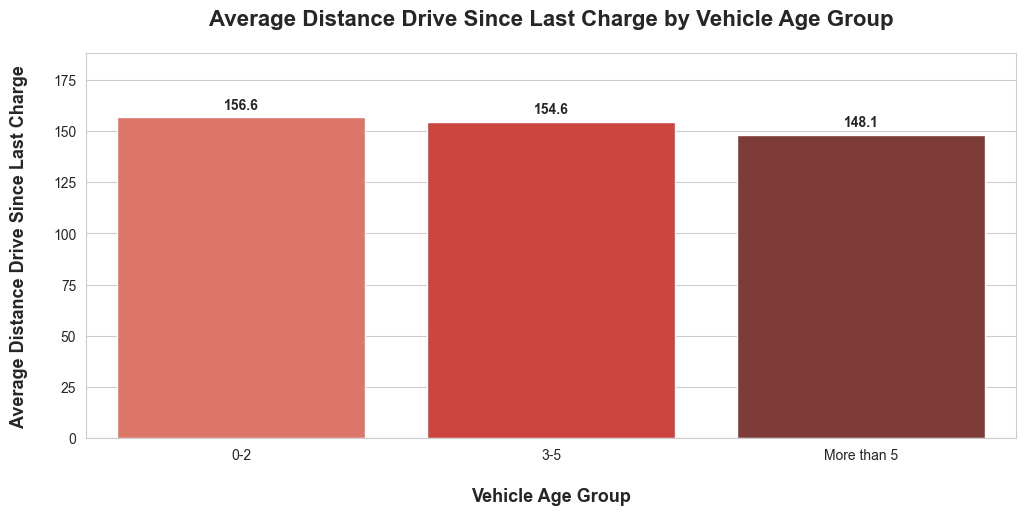

In [76]:
plt.figure(figsize=(12,5))
max_value = avg_distance_drive_since_last_charging_by_vehicle_age_group.select_dtypes(include='number').max().max()

bar_plot = sns.barplot(x='Vehicle Age Group',y='Distance Driven (since last charge) (km)',data=avg_distance_drive_since_last_charging_by_vehicle_age_group,palette='Reds_d')
plt.xlabel('Vehicle Age Group',fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.ylabel('Average Distance Drive Since Last Charge',fontdict={'fontsize':13,'fontweight':'bold'},labelpad=18)
plt.title("Average Distance Drive Since Last Charge by Vehicle Age Group",fontdict={'fontsize':16,'fontweight':'bold'},pad=20)
plt.ylim(0,max_value + max_value * 0.2)

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', fontweight='bold',
                     xytext = (0, 9),  # Offset label slightly above the bar
                     textcoords = 'offset points')


plt.show()

**Conclusion**

The data shows that newer vehicles, **aged 0-2 years**, drive the furthest since the last charge, averaging **156.60 km.** Vehicles aged **3-5 years** follow closely at **154.56 km**, while **vehicles aged more than 5 years** have the shortest distance, averaging **148.14 km.** 

**This suggests that as vehicles age, their distance driven between charges slightly decreases.**

# Key Insights and Findings from Data Analysis

**1. Charging Time Preferences**

-> Most charging sessions occur in the evening, indicating that users prefer charging their vehicles after the day's activities.

**2. Day of the Week Analysis**

-> Wednesday has the highest charging activity in terms of cost, while Thursday has the lowest, suggesting a mid-week peak in charging demand.

**3. Charger Type Significance**

-> The charging rate appears to be more dependent on the charger type than the vehicle model, aligning with industry expectations that higher-level chargers provide faster charging rates.

**4. Vehicle Model Impact**

-> Analysis did not find a significant relationship between the vehicle model and the charging rate, suggesting that the charging rate is more influenced by external factors like the charger type.

**5. User Type Behavior**

->  Different user types exhibit varying charging patterns, with commuters showing higher charging activities on weekdays compared to other user groups.

**6. Total Charging Cost Analysis**

-> The highest total charging cost occurs in the evening, which may be attributed to increased energy rates or higher usage during this time.

**7. Vehicle Age and Distance Driven**

-> Newer vehicles (aged 0-2 years) tend to drive the longest distances since their last charge, averaging 156.60 km, compared to older vehicles aged more than 5 years, which average 148.14 km. This suggests that newer vehicles may have better battery efficiency or performance​.

**8. Charger Type Influence Distance Drive**

-> Vehicles using DC Fast Chargers tend to drive the furthest, with an average distance of 157.98 km since the last charge. In contrast, those using Level 2 chargers have the shortest average distance, at 148.35 km, indicating that faster chargers may enable slightly longer trips between charges​.

**9. Effect of Vehicle Age**.

-> As vehicle age increases, the charging temperature also rises slightly. Vehicles aged 0-2 years have an average charging temperature of 14.80°C, while those aged more than 5 years experience a higher temperature of 16.40°C. This trend indicates that older vehicles may generate more heat during charging​.

**10. Charger Type Impact on Cost**

-> These results indicate that DC Fast Chargers are the most expensive option, likely due to their faster charging speeds, while Level 1 chargers are the most cost-effective but slower charging option​.